## ques y = f(x) =sin x  approximate this function with a polinomial function of the form
## y =w0 +w1x + w2x**2  in the range x = (0, 2pi)


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#session 13

In [53]:
def generateX(N):
    x = np.random.random(N)*np.pi*2
    y = np.sin(x)
    return x,y

In [54]:
x,y = generateX(70)



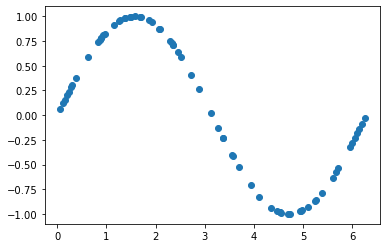

In [55]:
plt.scatter(x,y)
plt.show()

In [56]:
# defining model
 
def createA(x, D):     #  D - degree
    A= np.ones(D+1)
    for d in range(1,D+1):
        A[d] = x**d/(np.pi*2)**d    # normalising   
    return A
        

In [57]:
#ex 
createA(3,2)

array([1.        , 0.47746483, 0.22797266])

In [58]:
def init_w(D):
    w= np.random.random(D+1)
    return w

In [80]:
def predict_y(w,x):
    D = len(w)-1
    A = createA(x,D)
    
    yhat = A.dot(w) #dot product
    return yhat

In [82]:
def compute_se(yhat ,y): #squared error
    se =(y-yhat)**2
    return se

In [83]:
def calc_dw(x, yhat,y,D):
    dw = np.zeros(D+1)
    com = -2*(y-yhat) #          -2ab   coeff of x0
    dw[0]+= com
    for i in range(1,D+1):
        dw[i] +=com*(x**i)/(np.pi*2)**i #coeff of xi
    return dw

In [84]:
def update_w(w, dw, eeta):
    #print(dw)
    #print(w)
    w = w-eeta*dw
    return w


In [85]:
def train_w(x ,y ,w ,Nepoch , eeta):
    D = len(w)-1
    for epoch in range(Nepoch):
        for i in range (len(x)):           # x = N
            y_hat = predict_y(w, x[i])
            dw = calc_dw(x[i],y_hat,y[i],D)
            #print(dw)
            w = update_w(w,dw,eeta)
    return w

In [86]:
N =500
D =20


In [87]:
Nepoch = 100
eeta = 0.001
w = init_w(D)      # random w

In [88]:
x,y = generateX(N)
w= train_w(x, y, w, Nepoch, eeta)   #trained w

In [89]:
se =0
y_pred =[]

In [90]:
for i in range(N):
    y_pred.append(predict_y(w,x[i]))    #yhat
    se += compute_se(y[i], y_pred[i])
    
mse = se/N
y_pred = np.array(y_pred)

In [91]:
mse,se

(0.10433097299084096, 52.16548649542048)

In [92]:
def plotmodel(x, y, y_original):
    i = x.argsort()
    plt.figure(figsize=(20,9))
    plt.plot(x[i], y[i],color= "green", marker ="o")
    plt.plot(x[i], y_original[i],color= "red", marker ="o")
    plt.ylabel("F(X)")
    plt.xlabel("X")
    
    plt.legend(["estimated","True"])
    plt.title("Comparision")
    plt.show()

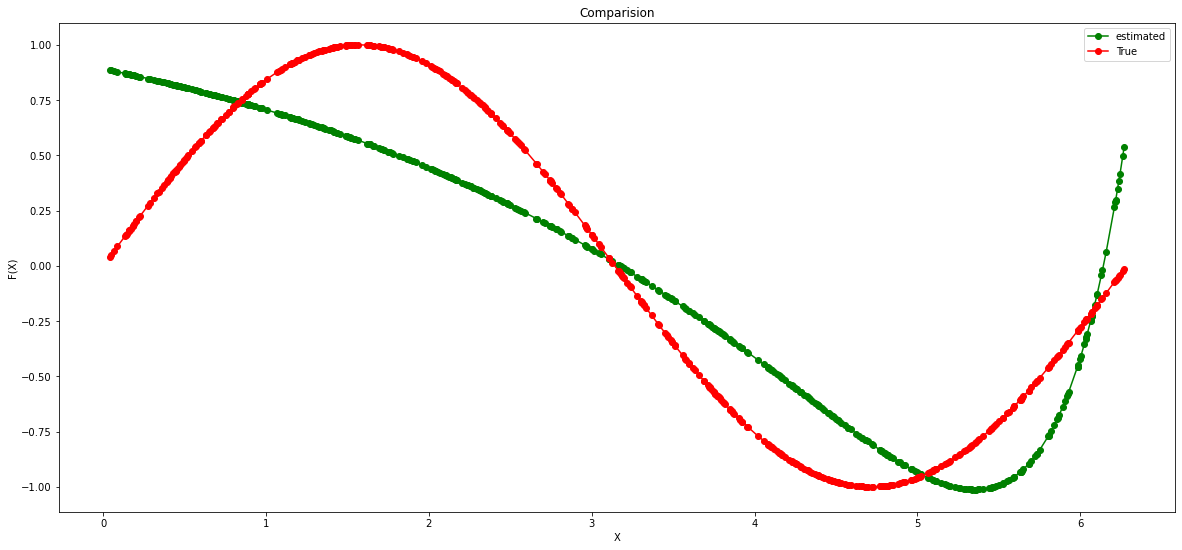

In [93]:
plotmodel(x,y_pred,y)